#Multilayer Perceptron on Energy Efficient dataset

## Loading Data

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt   
import numpy as np
import pandas as pd
import seaborn as sns


TF version: 2.9.2


### Energy Efficiency Dataset

<img src="https://miro.medium.com/max/1400/0*1TwLXhauaGFElF4c.webp" width=450 />


|  |  |  |  |  |  |
|---|---|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 768 | Area: | Computer |
| Attribute Characteristics: | Integer, Real | Number of Attributes: | 8 | Date Donated | 2012-11-30 |
| Associated Tasks: | Classification, Regression | Missing Values? | N/A | Number of Web Hits: | 447329 |



#### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
* X1 Relative Compactness
* X2 Surface Area
* X3 Wall Area
* X4 Roof Area
* X5 Overall Height
* X6 Orientation
* X7 Glazing Area
* X8 Glazing Area Distribution
* y1 Heating Load
* y2 Cooling Load


In [ ]:

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

# Feature names
colnames = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
            "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution",
            "Heating Load", "Cooling Load"]


dfenergy = pd.read_excel(data_url,names=colnames)

# display the dataframe
display(dfenergy)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


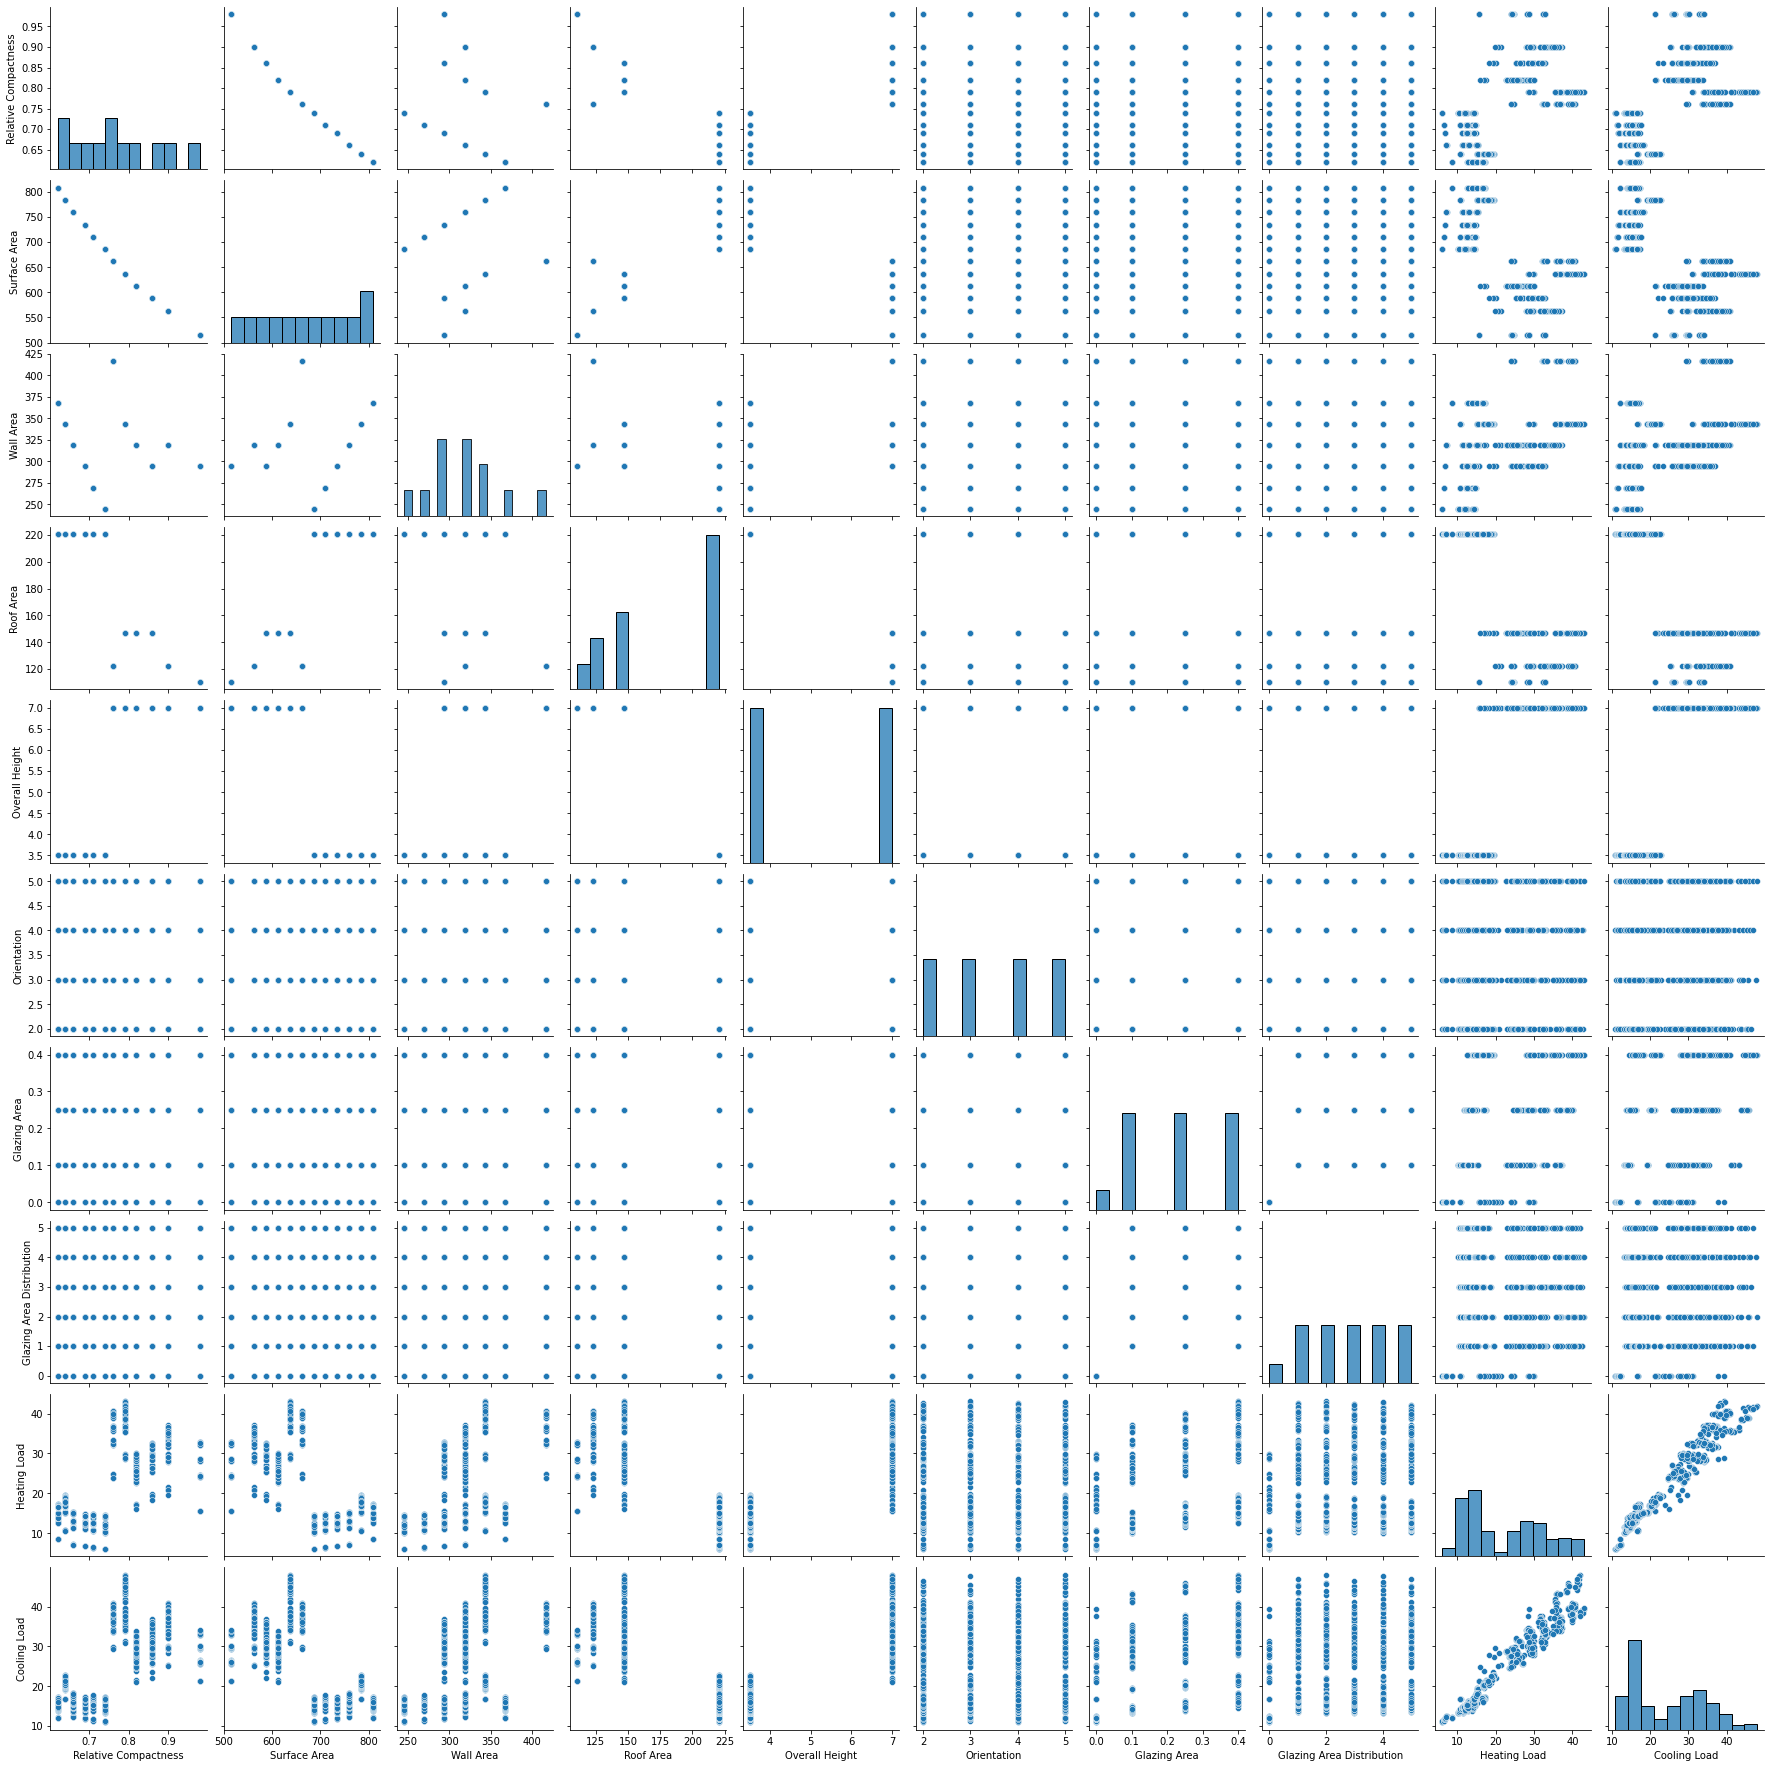

In [ ]:

sns.pairplot(dfenergy)

#HeatMap

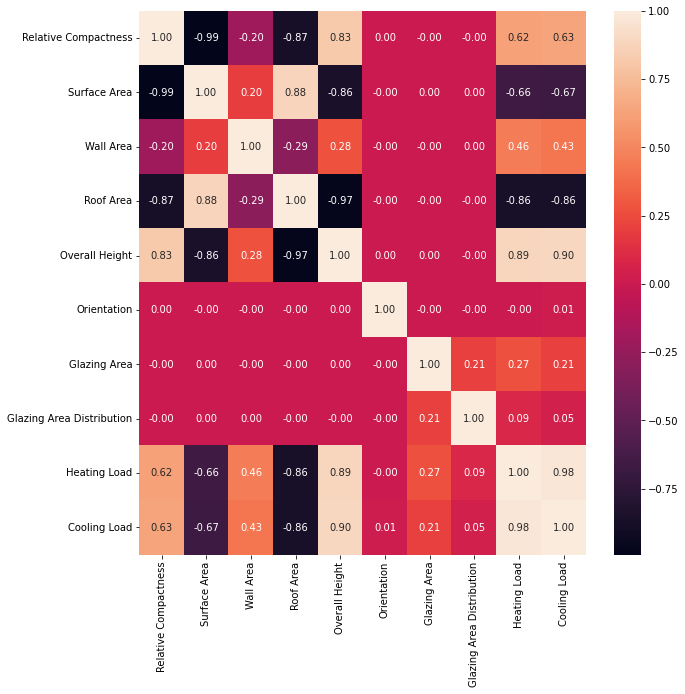

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dfenergy.corr(),annot=True,fmt='.2f')

## Data Split




In [ ]:
df_data = dfenergy.copy()

train_data = dfenergy.sample(frac=0.8, random_state=0)#Splitting the data(80% for training and 20% for testing)
test_data = dfenergy.drop(train_data.index)

x_train = train_data.drop(train_data.iloc[:,8:10],axis=1)
x_test =test_data.drop(test_data.iloc[:,8:10],axis=1)

y_train = train_data.drop(train_data.iloc[:, 0:8],axis = 1)
y_test = test_data.drop(test_data.iloc[:, 0:8],axis = 1)

In [ ]:
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(614, 8)

(154, 8)

(614, 2)

(154, 2)

In [ ]:
display(x_train)
display(x_test)
display(y_train)
display(y_test)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
661,0.66,759.5,318.5,220.50,3.5,3,0.4,3
122,0.74,686.0,245.0,220.50,3.5,4,0.1,2
113,0.79,637.0,343.0,147.00,7.0,3,0.1,2
14,0.82,612.5,318.5,147.00,7.0,4,0.0,0
529,0.98,514.5,294.0,110.25,7.0,3,0.4,1
...,...,...,...,...,...,...,...,...
25,0.74,686.0,245.0,220.50,3.5,3,0.0,0
110,0.82,612.5,318.5,147.00,7.0,4,0.1,2
149,0.90,563.5,318.5,122.50,7.0,3,0.1,3
152,0.86,588.0,294.0,147.00,7.0,2,0.1,3


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
9,0.86,588.0,294.0,147.0,7.0,3,0.0,0
11,0.86,588.0,294.0,147.0,7.0,5,0.0,0
19,0.79,637.0,343.0,147.0,7.0,5,0.0,0
23,0.76,661.5,416.5,122.5,7.0,5,0.0,0
28,0.71,710.5,269.5,220.5,3.5,2,0.0,0
...,...,...,...,...,...,...,...,...
746,0.74,686.0,245.0,220.5,3.5,4,0.4,5
753,0.69,735.0,294.0,220.5,3.5,3,0.4,5
754,0.69,735.0,294.0,220.5,3.5,4,0.4,5
759,0.66,759.5,318.5,220.5,3.5,5,0.4,5


,Heating Load,Cooling Load
661,15.18,17.63
122,10.32,13.57
113,37.26,34.62
14,16.95,21.16
529,32.26,33.34
...,...,...
25,6.05,11.19
110,23.67,24.80
149,29.01,32.85
152,25.41,31.73


,Heating Load,Cooling Load
9,19.95,21.97
11,18.31,27.87
19,28.75,39.44
23,23.93,29.40
28,6.37,11.27
...,...,...
746,14.17,16.94
753,14.28,15.87
754,14.37,16.54
759,15.16,18.06


In [ ]:
df_data.describe().transpose()[['mean','std']] 

,mean,std
Relative Compactness,0.764167,0.105777
Surface Area,671.708333,88.086116
Wall Area,318.500000,43.626481
Roof Area,176.604167,45.165950
Overall Height,5.250000,1.751140
Orientation,3.500000,1.118763
Glazing Area,0.234375,0.133221
Glazing Area Distribution,2.812500,1.550960
Heating Load,22.307195,10.090204
Cooling Load,24.587760,9.513306


#Defining a class for combining data and functionality. It is to improve the effectiveness of code usage.

In [ ]:
class MLP(keras.Model):
   
    
    def __init__(self, X, n_output, n_hidden, activ='relu'):
        super().__init__()
        self.normalizer =  tf.keras.layers.Normalization(axis=-1)
        self.normalizer.adapt(X.to_numpy())

        self.net = tf.keras.Sequential()
        self.net.add(self.normalizer)
        self.net.add(tf.keras.layers.Dense(n_hidden,activation=activ))
        self.net.add(tf.keras.layers.Dense(n_output))
        
        
        
        
        self.net.summary()
        
            
    def call(self, input):
        x = self.net(input)
        return x
    


In [ ]:
y_train.shape

(614, 2)

In [ ]:
model = MLP(x_train,2,20)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 20)                180       
                                                                 
 dense_3 (Dense)             (None, 2)                 42        
                                                                 
Total params: 239
Trainable params: 222
Non-trainable params: 17
_________________________________________________________________


In [ ]:
# custom metrics 
# code from https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

"Adam" as an optimizer with "learning_rate" 0.01 and have a loss function to be "mean squared error" and metrics as mse , mae and coeff_determination which we have defined above.

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse',metrics=['mse','mae',coeff_determination])


In [ ]:
history = model.fit(x_train, y_train, epochs=300,verbose=0,validation_split=0.2)

In [ ]:
def plot_learning(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [class]')

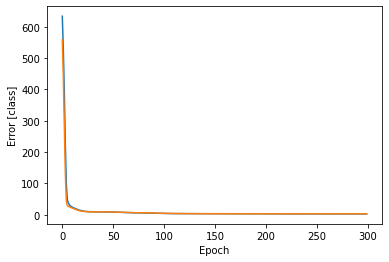

In [ ]:
plot_learning(history)

In [ ]:
model.evaluate(x_test,  y_test)

5/5 [==============================] - 0s 3ms/step - loss: 2.9472 - mse: 2.9472 - mae: 1.1549 - coeff_determination: 0.9672


[2.9472386837005615,
 2.9472386837005615,
 1.1548640727996826,
 0.9671869277954102]

In [ ]:
prediction=model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
np.vstack((np.array(y_test)[:, 0], prediction[:, 0])).T #we stacked vertically to comapre the outputs

array([[19.95      , 19.79653358],
       [18.31      , 19.97327614],
       [28.75      , 31.4862957 ],
       [23.93      , 28.45897675],
       [ 6.37      ,  8.75158119],
       [ 6.85      ,  8.84703255],
       [ 7.18      ,  9.18294716],
       [10.54      , 13.04953671],
       [10.77      , 13.21569538],
       [10.56      , 13.38185406],
       [ 8.5       , 10.27416325],
       [29.87      , 25.68747902],
       [26.91      , 22.84270668],
       [26.37      , 22.85302925],
       [32.94      , 31.38733292],
       [10.36      , 11.18576431],
       [11.11      , 10.21467018],
       [11.09      , 10.00475502],
       [11.68      , 10.5651207 ],
       [11.7       , 10.35520649],
       [11.69      , 10.25024796],
       [15.21      , 14.81312943],
       [12.93      , 11.66486359],
       [13.02      , 11.74466515],
       [24.13      , 24.359869  ],
       [24.25      , 24.37040329],
       [36.03      , 34.6271019 ],
       [32.41      , 31.71172523],
       [10.45      ,

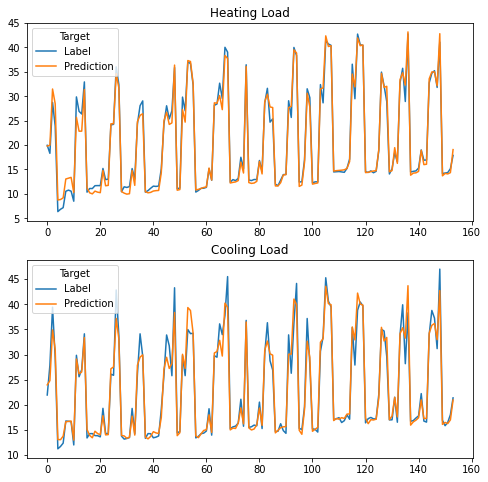

In [ ]:
plt.figure(figsize=(8,8))
for i in range(2): #we are using for loop to plot 2 subplots in a single figure
    plt.subplot(2,1, i+1)
    plt.plot(np.vstack((np.array(y_test)[:, i], prediction[:, i])).T)
    plt.legend(title='Target',labels=['Label','Prediction'])
    plt.title(y_test.columns[i])
    
    
    

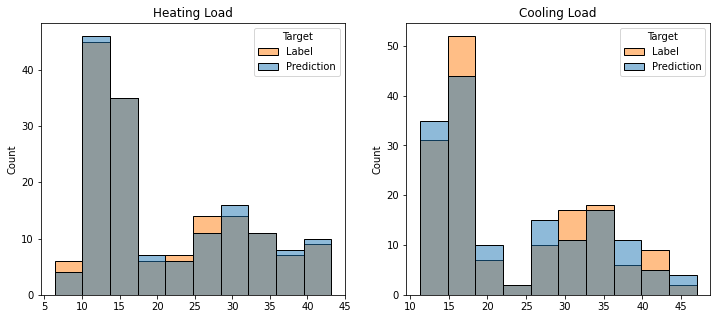

In [ ]:

plt.figure(figsize=(12,5))
for i in range(2): #we are using for loop to plot 2 subplots in a single figure
    plt.subplot(1,2, i+1)
    sns.histplot(data=np.vstack((np.array(y_test)[:, i], prediction[:, i])).T,legend=False)
    plt.legend(title='Target',labels=['Label','Prediction'])
    plt.title(y_test.columns[i])





